In [13]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import os

In [31]:
folder_path = '/content/drive/MyDrive/images'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(50, 50))
rows = 5
columns = 5
img_width, img_height = 224, 224

<Figure size 5000x5000 with 0 Axes>

1/1 [==============================] - 0s 197ms/step


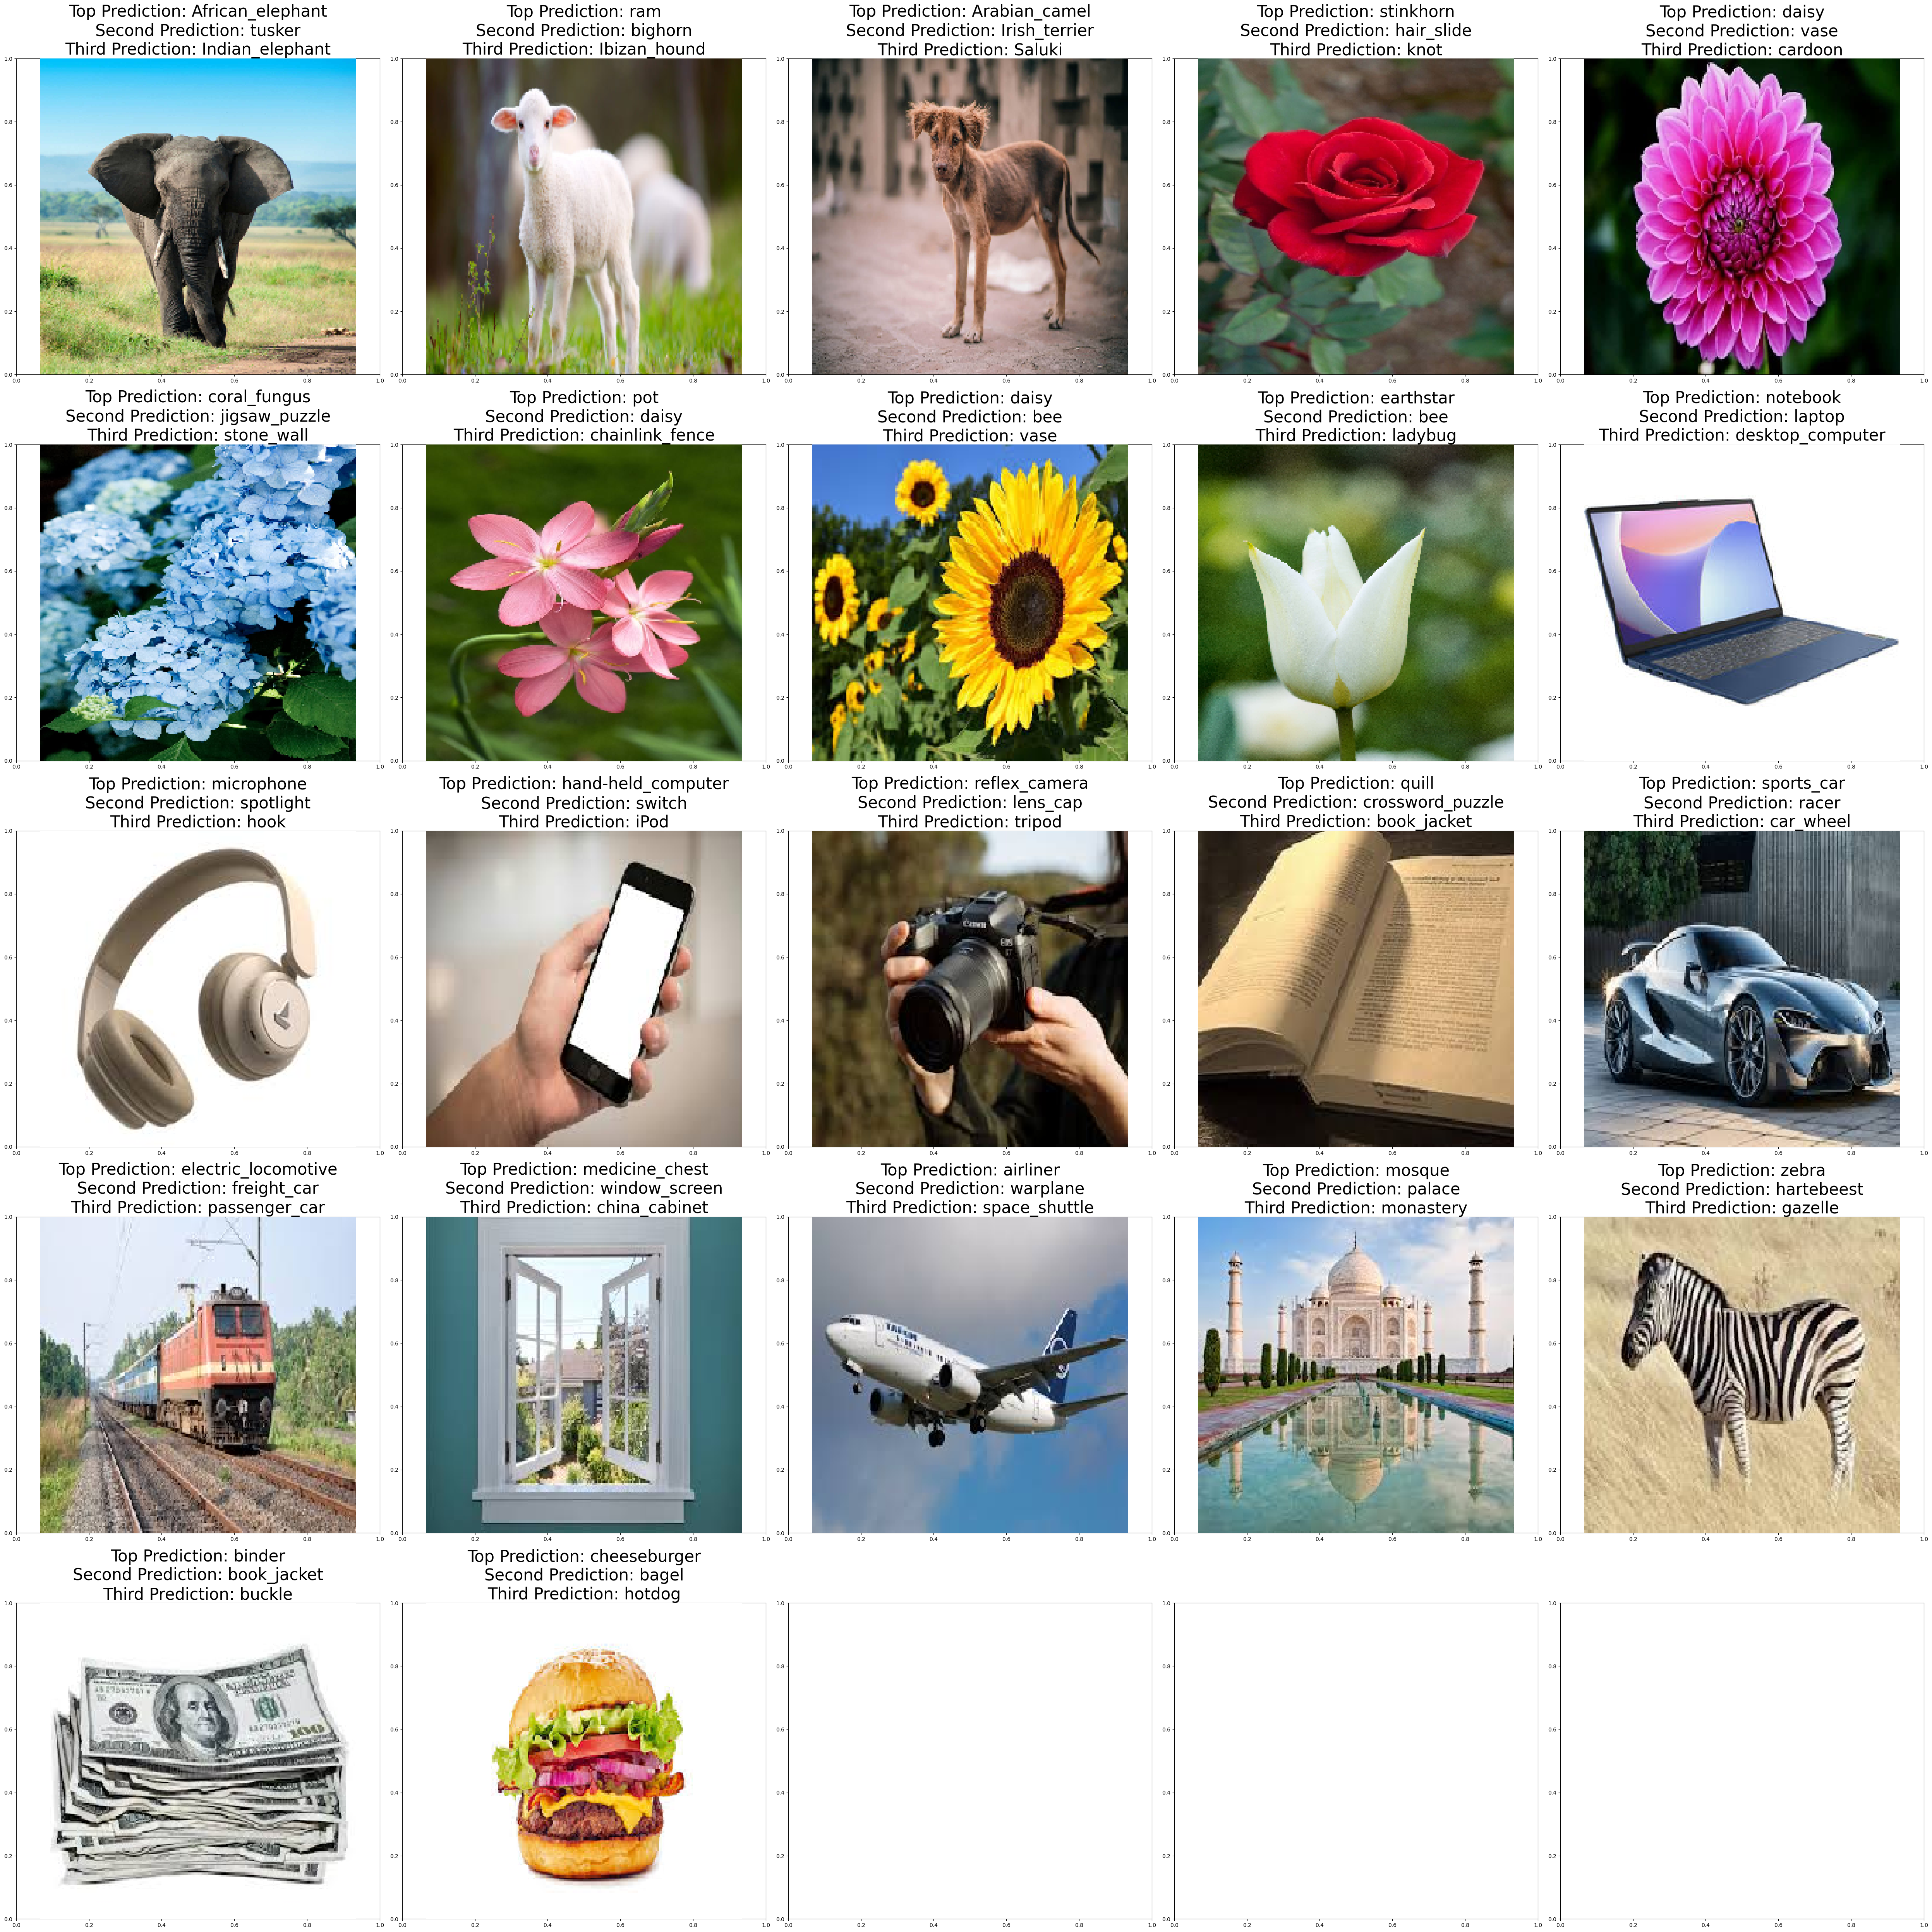

In [52]:
model_pretrained = ResNet50(weights='imagenet', include_top=True)
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(50, 50))
axes = axes.ravel()

for i, image_name in enumerate(images):
    if not image_name.endswith(('.jpg', '.jpeg', '.png')):
        continue
    img_path = os.path.join(folder_path, image_name)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = preprocess_input(img_data)


    fig.add_subplot(rows, columns, i + 1)


    predictions = model_pretrained.predict(img_data[np.newaxis, ...])
    top_predictions = decode_predictions(predictions, top=5)[0]
    predicted_classes = [pred[1] for pred in top_predictions]


    plt.imshow(img)
    plt.title(f'Top Prediction: {predicted_classes[0]}\n'
              f'Second Prediction: {predicted_classes[1]}\n'
              f'Third Prediction: {predicted_classes[2]}', fontsize=30)
    plt.axis('off')

plt.tight_layout()
plt.show()